In [1]:
import gym

import torch
import torch.autograd as autograd 

from dqn_utils import epsilon_greedy, plot, seed_everything
from gamma_RL.training import gamma_train

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

print("Print CUDA:  ", USE_CUDA)
print("Device   :", device)
if USE_CUDA:
  print("Device name  ", torch.cuda.get_device_name(0))

Print CUDA:   False
Device   : cpu


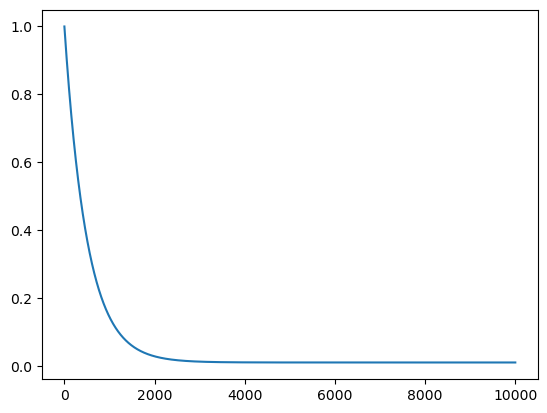

In [3]:
epsilon_greedy().plot()

In [4]:
env_id = "CartPole-v0"
env = gym.make(env_id)

In [5]:
#Run cell if using Tensorboard
from torch.utils.tensorboard import SummaryWriter
dir = 'tests/gamma_train/'
writer = SummaryWriter(log_dir=dir)

In [5]:
from dqn_utils import seed_everything

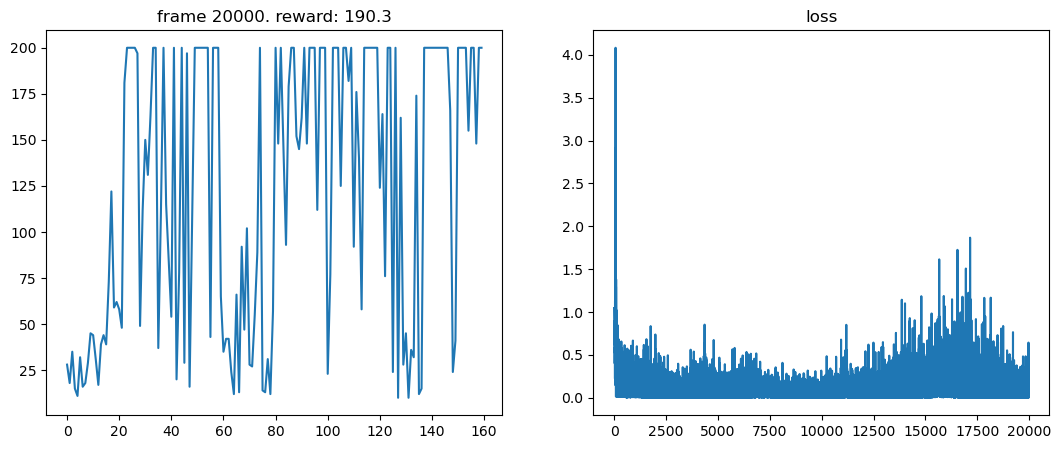

In [7]:
seed = 10

seed_everything(seed)
for i in range(5):
    seed_everything(seed)
    gamma_train_instantiate = gamma_train(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device,
                                            seed_number = seed)
    gamma_train_instantiate.training_loop(num_frames=20000, batch_size=32, run_number=i, wandb_plot=True)

In [7]:
from gamma_RL.training import gamma_train_epsilonseed

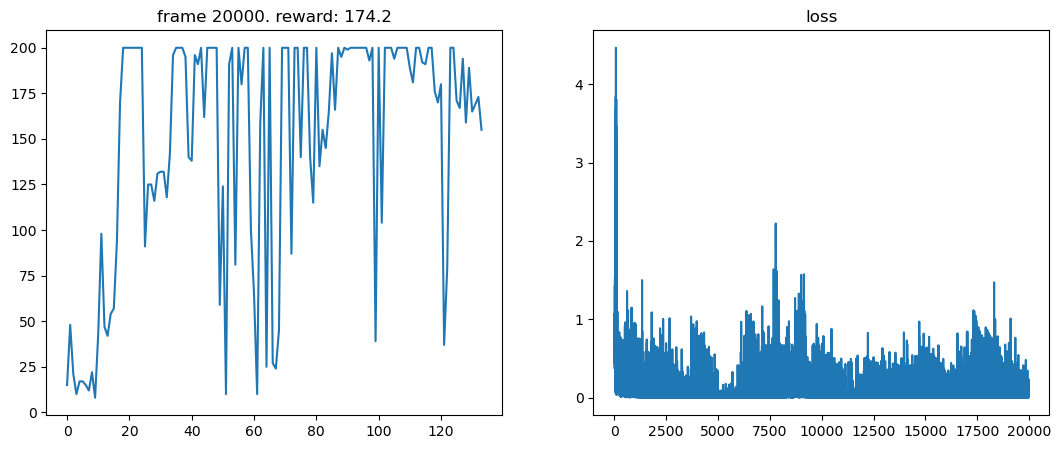

--- Logging error ---
Traceback (most recent call last):
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/logging/__init__.py", line 1089, in emit
    self.flush()
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/logging/__init__.py", line 1069, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/threading.py", line 890, in _bootstrap
    self._bootstrap_inner()
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/wandb/sdk/internal/internal_util.py", line 50, in run
    self._run()
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/wandb/sdk/internal/internal_util.py", line 101, in _run
    self._process(record)
  File "/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-pac

In [8]:
seed = 10

seed_everything(seed)

for i in range(3):
    seed_everything(seed)
    gamma_train_instantiate = gamma_train_epsilonseed(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device,
                                            seed_number = seed)
    gamma_train_instantiate.training_loop(num_frames=20000, batch_size=32, run_number=i, wandb_plot=True)

Possible reasons for why training gamma might not work
- Gamma would be a tensor, so maybe the loss function is messed up since gamma should be an integer when multiplying it to the estimated Q value
- When defining gamma as a parameter in my model, it is not included in the forward pass which can be an issue. Even though in training code, I optimized all the parameters. Backprop might not work if there is no forward propagation